# Data Analysis 
### *Harlan Heilman*

If we have a set of data that we want to analyse there are several ways that it can be done. The general process is as follows:

1. Load the data into some object, a list, array, dataframe, etc.
2. Plot the data on a graph.
3. Determine the type of function needed to fit the data.
4. Plot the data allong with it's regression. 

Different groups look for different things as they fit their data, and as such there are many packages that have been built focusing on making certian things easier. The main four packages are

- `numpy` - This is a basis array based python package that is mostly written in C and used for analysis of large dimensional arrays or matriceis 
- `scipy` - This uses numpy's array structure but is expanded to include modules desighned to be used by the science community
- `matplotlib.pyplot` - The standard python plotting package that allows for generation of complex figures based on data.
- `uncertianties` - Allows for easy analysis of uncertian values

As we could imagine we will need these packages to start fitting out data. Run the following cell of code to check if the active kernel has `numpy` and `scipy` installed. If they are, it will import their packages allowing you to call any of their built in fucntions; and if it does not it will attempt to pip install them. We will also import `sys` for various reasons. 

In [1]:
try:
    import numpy as np; import scipy as sc; import matplotlib.pyplot as plt; import uncertainties
except ImportError:
    import sys
    !{sys.executable} -m pip install numpy scipy matplotlib pathlib uncertainties
    print("Restart your kernel and try again")

Now that the prior cell has been run, this notebook has the `numpy` and `scipy` packages installed in a way where we can use **np.(built in function)**,  **sc.(built in function)**, and **plt.(built in function)** to run functions from any of these packages. 

## Loading Data

In [4]:
# Its a good idea to include all your imports needed to run the cell since you dont have to re-run cells all the time
import numpy as np; import matplotlib.pyplot as plt

x = np.linspace(start = 0, stop = 5, num = 100) #1,000 Equally spaced points from 0-5 

#initialize our rng with a fixed seed (2) such that every time after this we will get the same data
rng = np.random.default_rng(seed=2)

noise = .25*rng.normal(loc=0, scale=1, size=100) #gaussian distribution centered at x = 0, with variance = 1 used to simulate noise
data = np.abs(5*np.exp(-(x-1)**2/2) + noise) #Simulated data absolute value for future use

# rng.normal?
#If you forget what a function does, and what parameters are needed, you can put a questionmark after the function to return the documentation on it. 
#You can also use tab to bring up a list of possible functions, i.e. rng.(tab) brings up a list of all possible probability distribution functions. 

## Plotting Data

Matplotlib has two objects that you can effect, the `figure` and the `axes`. The `figure` object defines the plot window and all of its attributes while the `axes` live within the `figure` and are used to represent the data we want to plot. Now we can bypas this by using an interprative procedural method of just calling `matplotlib.pyplot` where we automatically instance the figure and axes but you lose controll over the figure and axes objects. It is recomended to plot data first using `plt.` to analyse data then use figures and axes to generate figures that you would include in a report. 

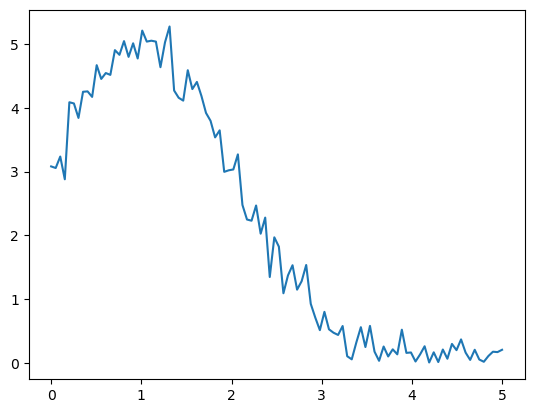

In [139]:
import matplotlib.pyplot as plt
plt.plot(x,data) #plots the data

Text(0, 0.5, 'data')

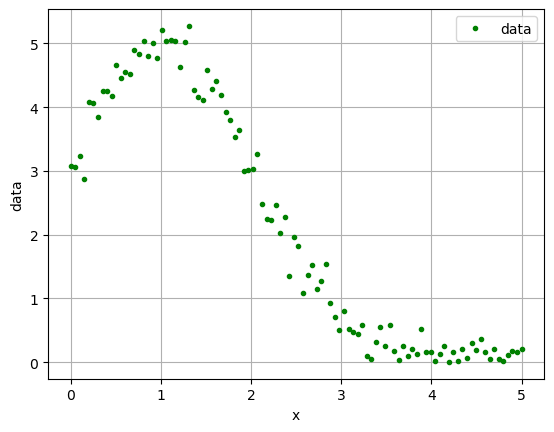

In [140]:
plt.plot(x,data, 'g.', label = 'data')
#####################################
#plt.plot( x, y, 'color + linetype', label = 'title of the data')
#####################################
plt.legend()

#Or you can explicitly define your legend using 
plt.legend(['data'])
#####################################
#plt.legend(input a list of strings i.e. ['title1', 'title2', ...])
#####################################

plt.grid() #adds a grid
plt.xlabel('x') 
plt.ylabel('data') 

Text(0.5, 0, '$\\theta$ or maybe $\\vec{q}$ or even $\\frac{2\\pi\\hbar^2}{mkT}$')

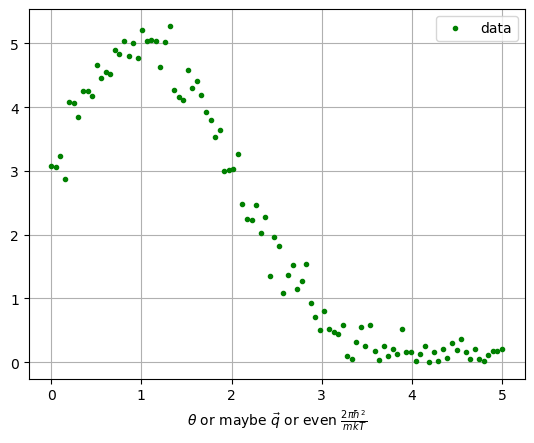

In [141]:
# Now if we wanted to use typesetting in our lebels, we must use r'string with funny charechters like /theta' to tell python to read the /theta 
plt.plot(x,data, 'g.', label = 'data')
plt.legend()
plt.grid()

plt.xlabel(r'$\theta$ or maybe $\vec{q}$ or even $\frac{2\pi\hbar^2}{mkT}$')

#But some of the pain in this method of plotting comes from having to re gnerate the plot every time we want a new plot. 


Now that we have our data, lets look to a least squares fit for this. Ideally we want this to be the easiest method of least squares fit. For this we will use the optimization package `scipy.optimize`, namely the curve fit function. This returns two arrays, one is an array of parameters that give the fit function, and the second gives the covariance matrix. 

Text(0, 0, '$f(x) = Ae^{-(x-\\mu)^2/2\\sigma^2}$')

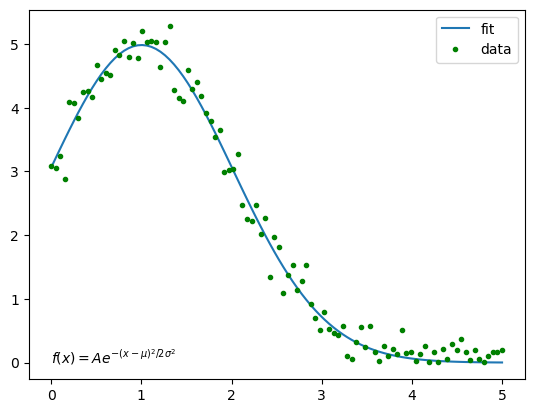

In [8]:
from scipy.optimize import curve_fit; import numpy as np; import matplotlib.pyplot as plt

'''
Unfortunately we need a special type of function for this data. Per the curve fit:
f : callable
    The model function, f(x, ...). It must take the independent
    variable as the first argument and the parameters to fit as
    separate remaining arguments.
And Numpy functions do not have fit arguements so we need to make out orwn function
'''

def Gauss(x, A, sigma, mu):
    '''
    This type of commenting is called a docsting and alows you to call the documentation on our new Gauss() function
    A : amplitude
    sigma : standard deviation
    mu : mean
    '''
    return A*np.exp(-.5*((x-mu)/sigma)**2)
#So we can run something like Gauss?

parameters, covariance = curve_fit(Gauss, x, data)

# patameters has the least squares values for the parameters
#covariance returns a matrix whos diagonal are uncertinaties in said parameters

plt.plot(x, Gauss(x, *parameters), label = 'fit') #use *parameters so the elements are used in the Gauss function as opposed to the list.
plt.plot(x, data, 'g.', label = 'data')
plt.legend()

plt.annotate(r'$f(x) = Ae^{-(x-\mu)^2/2\sigma^2}$', (0,0))

## Uncertinaty 

[Michael Forbes](https://swan.physics.wsu.edu/forbes/public/student_resources/uncertanties/) has a good explaination of using the uncertinaties package with some good examples. 

In [4]:
from uncertainties import ufloat
pm = np.diag(covariance)

A = ufloat(parameters[0], pm[0])
sigma = ufloat(parameters[1], pm[1])
mu = ufloat(parameters[2], pm[2])

#You can use formated print statements like you would in matlab
#print('string {:.number of decimal places} more string'.format(number that goes in the {:.} location))
print(covariance)
print("Amplitude : {:.8}".format(A))
print("Standard Deviation : {:.8}".format(sigma))
print("Mean : {:.8}".format(mu))

[[ 0.00233506 -0.00045223  0.00012402]
 [-0.00045223  0.00027317 -0.00012981]
 [ 0.00012402 -0.00012981  0.00023071]]
Amplitude : 4.9839506+/-0.0023351
Standard Deviation : 1.0147918+/-0.0002732
Mean : 1.0023594+/-0.0002307


## Matplotlib the Good Way

Now lets plot this function using a defined figure and axis.

Text(0.0, 1, '$f(x) = A\\exp(-(x-\\mu)^2/2\\sigma^2)$')

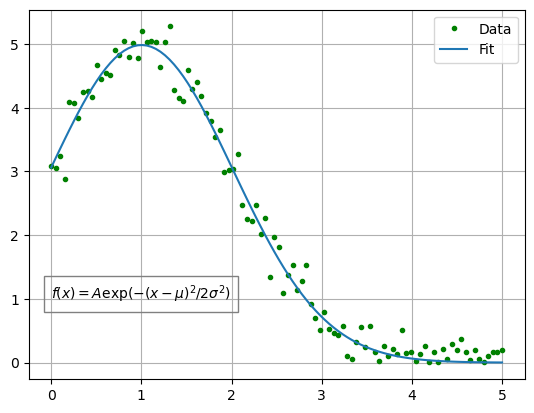

In [23]:
import matplotlib.pyplot as plt

#Initialize the figure and axes. This can be done in other ways, first lets see what it looks like for a single figure with no other plots 
fig, ax = plt.subplots()

ax.plot(x,data, 'g.')
ax.plot(x,Gauss(x,*parameters))
ax.legend(['Data','Fit'])
ax.grid()
ax.text(0.0, 1, r'$f(x) = A\exp(-(x-\mu)^2/2\sigma^2)$', color='black', 
        bbox=dict(facecolor='none', edgecolor='grey', boxstyle='square,pad=.5'))

Now the biggest benifit of plotting this way is that at any point we can call back the figure called `fig` and we dont have to retype all the inputs for the function. 

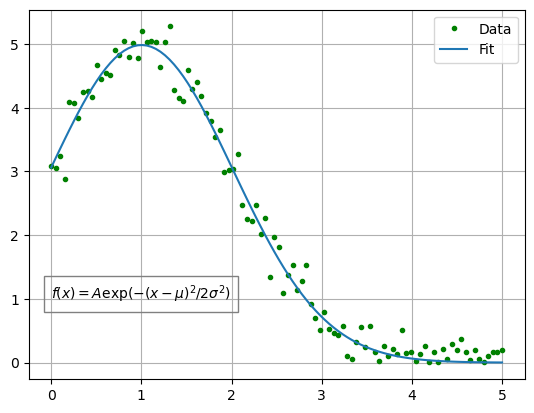

In [27]:
display(fig)

Now, for labels, titles, etc. the only change we need to make is to use the prefix `ax.set_` before any attribute we want to change. 

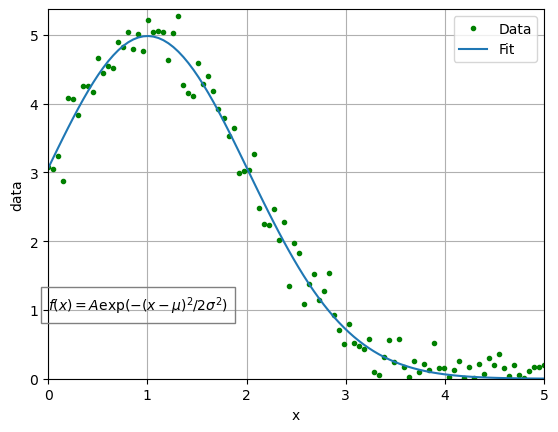

In [34]:
ax.set_xlabel('x')
ax.set_ylabel('data')
ax.set_xlim(0,5)
ax.set_ylim(0,np.amax(data)+.1)
display(fig)

Anaconda